# Cargar los datos
<hr>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Descriptores_moleculares/Dataframes_descriptores/des_MAPK1.csv")

# Visualizar datos
<hr>

In [3]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL319244,CAFFEIC ACID PHENETHYL ESTER,O=C(/C=C/c1ccc(O)c(O)c1)OCCc1ccccc1,IC50,'=',686.0000,nM,11.537535,11.537535,0.196678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL259551,NaN,Nc1n[nH]c2nnc(-c3c(-c4ccccc4)nn4ccccc34)cc12,IC50,'=',1900.0000,nM,5.929329,5.929329,0.406375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL3695623,NaN,CCNC(=O)Nc1ccc2ncc(-c3ccc(OCCCN4CCOCC4)cc3)nc2n1,IC50,'=',1800.0000,nM,11.726190,11.726190,0.301854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,CHEMBL3662970,NaN,Cc1cc(-c2n[nH]c3cc(NC(=O)NCc4c(C)cc(Cl)cc4Cl)n...,IC50,'=',2.8680,nM,12.311418,12.311418,0.269358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,CHEMBL3658652,NaN,C[C@@H](NC(=O)Nc1cc2[nH]nc(-c3ccc(=O)[nH]c3)c2...,IC50,'=',0.3037,nM,13.023951,13.023951,0.195296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Añadir el valor de 1000
<hr>

In [4]:
# 1 significa inhibidor
# 0 significa no inhibidor

def inhibidor(IC50):
    if IC50 > 1000:
        return 0
    else:
        return 1

In [5]:
df["Inhibidor"] = df["Standard Value"].apply(inhibidor)

In [6]:
df.to_csv("Datos_con_1000/MAPK1_1000.csv", index=False)

# Escalado de datos
<hr>

In [6]:
col_names = df.columns[7:217]

In [7]:
descriptors = df[col_names]

In [8]:
descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.537535,11.537535,0.196678,-0.445837,0.503108,10.666667,284.311,268.183,284.104859,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.929329,5.929329,0.406375,0.406375,0.519331,11.360000,327.351,314.247,327.123243,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.726190,11.726190,0.301854,-0.301854,0.523647,14.281250,436.516,408.292,436.222289,168.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,12.311418,12.311418,0.269358,-0.391885,0.402390,10.933333,441.322,423.178,440.091915,152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13.023951,13.023951,0.195296,-0.436066,0.426239,11.931034,392.394,375.258,392.139702,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaled_data = scaler.fit_transform(descriptors)

In [11]:
df_scaled = pd.DataFrame(scaled_data, columns=descriptors.columns)

In [12]:
df_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.626534,0.626534,0.213461,0.770539,0.533817,0.029158,0.026593,0.027945,0.026587,0.026786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,0.149958,0.149958,0.441193,0.913614,0.551365,0.063618,0.037485,0.040557,0.037479,0.034439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.642565,0.642565,0.327682,0.794712,0.556033,0.208810,0.065110,0.066307,0.065104,0.065051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.5
3,0.692297,0.692297,0.292391,0.779597,0.424877,0.042412,0.066326,0.070383,0.066084,0.054847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.5
4,0.752847,0.752847,0.211960,0.772180,0.450673,0.092000,0.053944,0.057262,0.053942,0.051020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0.666082,0.666082,0.095846,0.860227,0.183353,0.053372,0.086398,0.088237,0.086386,0.084184,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.20,0.0
2933,0.784102,0.784102,0.110682,0.770582,0.443373,0.197671,0.078386,0.081499,0.078258,0.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2934,0.708848,0.708848,0.090794,0.831333,0.615985,0.169060,0.044583,0.047134,0.044574,0.042092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.5
2935,0.767035,0.767035,0.213369,0.765338,0.475747,0.191819,0.072047,0.075469,0.071923,0.065051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


# Filtro de baja varianza
<hr>

In [13]:
df_scaled.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.626534,0.626534,0.213461,0.770539,0.533817,0.029158,0.026593,0.027945,0.026587,0.026786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,0.149958,0.149958,0.441193,0.913614,0.551365,0.063618,0.037485,0.040557,0.037479,0.034439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.642565,0.642565,0.327682,0.794712,0.556033,0.208810,0.065110,0.066307,0.065104,0.065051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.5
3,0.692297,0.692297,0.292391,0.779597,0.424877,0.042412,0.066326,0.070383,0.066084,0.054847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.5
4,0.752847,0.752847,0.211960,0.772180,0.450673,0.092000,0.053944,0.057262,0.053942,0.051020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.5


In [14]:
threshold = 0.01

In [15]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=threshold)

In [16]:
selector.fit(df_scaled)

VarianceThreshold(threshold=0.01)

In [17]:
des_var= df_scaled.loc[:, selector.get_support()]

In [18]:
des_var

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,...,fr_halogen,fr_methoxy,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfone,fr_urea
0,0.626534,0.626534,0.213461,0.770539,0.533817,0.029158,0.456904,0.334903,0.664282,0.569411,...,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.149958,0.149958,0.441193,0.913614,0.551365,0.063618,0.136567,0.693707,0.304603,0.170195,...,0.000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
2,0.642565,0.642565,0.327682,0.794712,0.556033,0.208810,0.434847,0.366247,0.632861,0.541923,...,0.000,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.5
3,0.692297,0.692297,0.292391,0.779597,0.424877,0.042412,0.435440,0.834101,0.163868,0.542661,...,0.250,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.5
4,0.752847,0.752847,0.211960,0.772180,0.450673,0.092000,0.435875,0.841053,0.156898,0.543204,...,0.125,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0.666082,0.666082,0.095846,0.860227,0.183353,0.053372,0.221446,0.693729,0.304582,0.275974,...,0.000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
2933,0.784102,0.784102,0.110682,0.770582,0.443373,0.197671,0.295298,0.657978,0.340420,0.368011,...,0.125,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2934,0.708848,0.708848,0.090794,0.831333,0.615985,0.169060,0.439236,0.886451,0.129460,0.531077,...,0.000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.5
2935,0.767035,0.767035,0.213369,0.765338,0.475747,0.191819,0.453964,0.657981,0.340416,0.565747,...,0.125,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [19]:
des_var.to_csv("Baja_varianza/MAPK1_var.csv", index=False)

# Determinación de correlación
<hr>

In [20]:
correlation_spearman = des_var.corr(method='spearman')

In [21]:
correlation_spearman

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,...,fr_halogen,fr_methoxy,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfone,fr_urea
MaxAbsEStateIndex,1.000000,1.000000,-0.376456,-0.516461,-0.406008,0.334732,-0.181205,-0.120779,0.121747,-0.181296,...,0.699238,-0.041105,-0.020994,0.002653,-0.155188,0.016642,-0.393932,0.041294,0.108281,-0.440334
MaxEStateIndex,1.000000,1.000000,-0.376456,-0.516461,-0.406008,0.334732,-0.181205,-0.120779,0.121747,-0.181296,...,0.699238,-0.041105,-0.020994,0.002653,-0.155188,0.016642,-0.393932,0.041294,0.108281,-0.440334
MinAbsEStateIndex,-0.376456,-0.376456,1.000000,0.098477,0.078339,-0.359064,0.198537,0.078812,-0.081595,0.195302,...,-0.303880,0.136876,0.064200,0.049466,0.027850,-0.095068,0.321594,-0.066688,-0.039201,0.272793
MinEStateIndex,-0.516461,-0.516461,0.098477,1.000000,0.348887,-0.112902,-0.244337,0.214323,-0.271630,-0.243769,...,-0.585899,0.000662,0.015842,0.016831,0.112455,0.114461,0.173038,0.010412,-0.214337,0.110149
qed,-0.406008,-0.406008,0.078339,0.348887,1.000000,0.006408,-0.021432,0.149547,-0.156243,-0.022962,...,-0.281024,-0.026356,0.025776,0.009782,-0.014526,-0.055032,0.027965,-0.060447,-0.009458,0.185013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_piperzine,0.016642,0.016642,-0.095068,0.114461,-0.055032,0.150245,-0.150753,-0.107654,0.103132,-0.150388,...,0.017977,-0.045543,-0.025657,-0.019326,0.055128,1.000000,-0.162217,0.020249,-0.020474,-0.152435
fr_pyridine,-0.393932,-0.393932,0.321594,0.173038,0.027965,-0.385674,0.369900,0.259649,-0.248993,0.370223,...,-0.352214,0.008671,0.010086,-0.003057,-0.014606,-0.162217,1.000000,-0.056966,-0.055696,0.557804
fr_sulfide,0.041294,0.041294,-0.066688,0.010412,-0.060447,0.067525,-0.066713,0.012622,-0.003866,-0.067942,...,-0.030838,-0.037509,-0.021794,-0.016416,-0.028830,0.020249,-0.056966,1.000000,-0.017391,-0.069713
fr_sulfone,0.108281,0.108281,-0.039201,-0.214337,-0.009458,0.035892,-0.109125,0.028894,-0.035560,-0.108764,...,0.012691,-0.066325,-0.024359,-0.018348,-0.021023,-0.020474,-0.055696,-0.017391,1.000000,-0.116578


In [22]:
correlation_spearman_abs = correlation_spearman.abs()

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


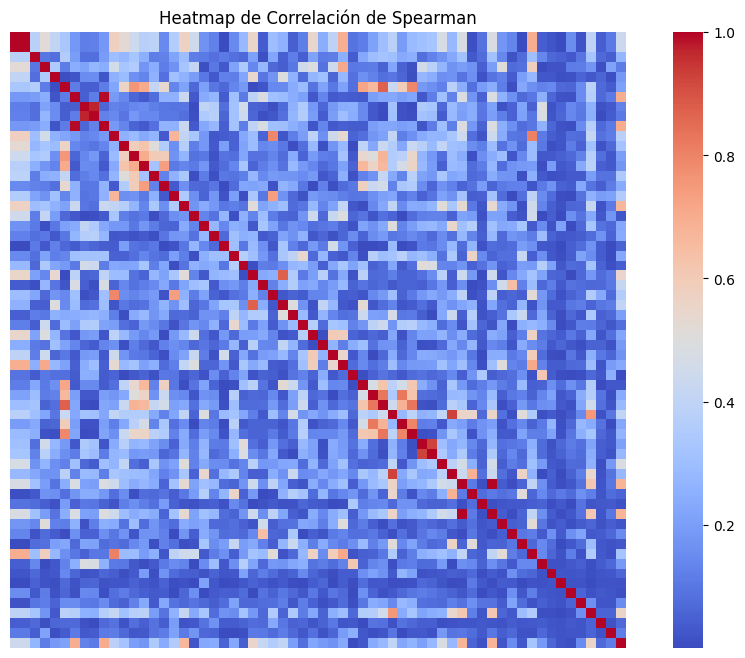

In [24]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [25]:
import random

to_keep = []

for col in correlation_spearman.columns:
    for idx in range(len(correlation_spearman)):
        # Usa .iloc para acceder a los elementos por posición
        if abs(correlation_spearman.iloc[idx][col]) > 0.85 and col != correlation_spearman.index[idx]:
            # Solo agregar si la variable no está ya en la lista para evitar duplicados
            if col not in to_keep and correlation_spearman.index[idx] not in to_keep:
                # Elegir aleatoriamente una variable del par
                selected_variable = random.choice([col, correlation_spearman.index[idx]])
                if selected_variable not in to_keep:
                    to_keep.append(selected_variable)

# Ahora 'to_keep' contendrá las variables seleccionadas
print("Variables seleccionadas:", to_keep)


Variables seleccionadas: ['MaxAbsEStateIndex', 'SPS', 'MaxPartialCharge', 'MinPartialCharge', 'SMR_VSA7', 'fr_Ar_N', 'fr_Al_OH', 'fr_Ar_NH']


In [26]:
df_corr = des_var.drop(columns=to_keep)

In [27]:
correlation_spearman = df_corr.corr(method='spearman')

In [28]:
correlation_spearman_abs = correlation_spearman.abs()

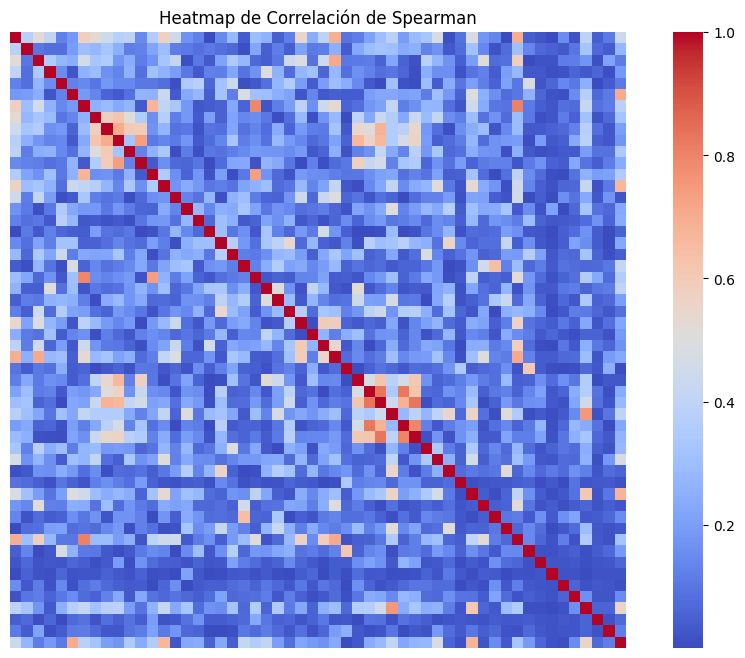

In [29]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [30]:
df_corr.to_csv("Alta_correlacion/MAPK1_corr.csv", index=False)

# Determinación de normalidad
<hr>

In [31]:
dic_norm = {}

In [32]:
from scipy.stats import anderson

for i in df_corr.columns:
    result = anderson(df_corr[i], dist="norm")
    if result.statistic > result.critical_values[2]:
        resultado = 0 # No es normal
    else:
        resultado = 1 # Es normal
    dic_norm[i] = resultado

# Pruebas de hipótesis
<hr>

In [33]:
df_h = pd.concat((df_corr, df["Inhibidor"]), axis=1)

In [34]:
df_h

,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_methoxy,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfone,fr_urea,Inhibidor
0,0.626534,0.213461,0.770539,0.533817,0.664282,0.569411,0.014561,0.756182,0.002735,0.876510,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
1,0.149958,0.441193,0.913614,0.551365,0.304603,0.170195,0.003091,0.618921,0.261857,0.869125,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0
2,0.642565,0.327682,0.794712,0.556033,0.632861,0.541923,0.014100,0.740249,0.138760,0.507001,...,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.5,0
3,0.692297,0.292391,0.779597,0.424877,0.163868,0.542661,0.183871,0.692696,0.170700,0.736910,...,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.5,1
4,0.752847,0.211960,0.772180,0.450673,0.156898,0.543204,0.037863,0.692657,0.180596,0.684880,...,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0.666082,0.095846,0.860227,0.183353,0.304582,0.275974,0.011140,0.618640,0.280457,0.821623,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0
2933,0.784102,0.110682,0.770582,0.443373,0.340420,0.368011,0.183861,0.499856,0.437163,0.367540,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
2934,0.708848,0.090794,0.831333,0.615985,0.129460,0.531077,0.011295,0.615362,0.338784,0.454741,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.5,1
2935,0.767035,0.213369,0.765338,0.475747,0.340416,0.565747,0.183861,0.653116,0.480706,0.509673,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1


In [35]:
grupo_inhibidor = df_corr[df_h["Inhibidor"] == 1]

In [36]:
grupo_inhibidor

,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_halogen,fr_methoxy,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfone,fr_urea
0,0.626534,0.213461,0.770539,0.533817,0.664282,0.569411,0.014561,0.756182,0.002735,0.876510,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.692297,0.292391,0.779597,0.424877,0.163868,0.542661,0.183871,0.692696,0.170700,0.736910,...,0.250,0.000000,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.5
4,0.752847,0.211960,0.772180,0.450673,0.156898,0.543204,0.037863,0.692657,0.180596,0.684880,...,0.125,0.000000,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.5
5,0.694619,0.132266,0.791349,0.462055,0.307853,0.543204,0.013939,0.697621,0.191176,0.687634,...,0.000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.5
6,0.771169,0.247191,0.767053,0.374874,0.306167,0.543447,0.037863,0.675686,0.232208,0.624008,...,0.125,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,0.925256,0.199638,0.602455,0.269387,0.340439,0.427171,0.999991,0.637611,0.383241,0.501098,...,0.500,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2931,0.727064,0.007852,0.819090,0.518948,0.642229,0.372379,0.013966,0.610701,0.353978,0.512971,...,0.000,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2933,0.784102,0.110682,0.770582,0.443373,0.340420,0.368011,0.183861,0.499856,0.437163,0.367540,...,0.125,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2934,0.708848,0.090794,0.831333,0.615985,0.129460,0.531077,0.011295,0.615362,0.338784,0.454741,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.5


In [37]:
grupo_no_inhibidor = df_corr[df_h["Inhibidor"] == 0]

In [38]:
grupo_no_inhibidor

,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_halogen,fr_methoxy,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfone,fr_urea
1,0.149958,0.441193,0.913614,0.551365,0.304603,0.170195,0.003091,0.618921,0.261857,0.869125,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
2,0.642565,0.327682,0.794712,0.556033,0.632861,0.541923,0.014100,0.740249,0.138760,0.507001,...,0.000,0.000000,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.5
34,0.531397,0.189370,0.695268,0.582430,0.324178,0.294811,0.012345,0.545824,0.373419,0.459378,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
35,0.517824,0.116467,0.769391,0.552741,0.332016,0.294784,0.012206,0.662552,0.276185,0.567742,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
49,0.698248,0.161908,0.793878,0.686923,0.225194,0.543370,0.011257,0.723390,0.264689,0.652949,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,0.938432,0.030157,0.732518,0.425519,0.309079,0.367473,0.183861,0.509778,0.480491,0.585993,...,0.375,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
2880,0.692917,0.326490,0.776851,0.636687,0.582655,0.543589,0.014145,0.782302,0.230034,0.641606,...,0.000,0.333333,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.5
2926,0.852620,0.023026,0.031973,0.251654,0.407585,0.704549,0.040283,0.589275,0.517529,0.383876,...,0.375,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2932,0.666082,0.095846,0.860227,0.183353,0.304582,0.275974,0.011140,0.618640,0.280457,0.821623,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0


In [39]:
p_values = {}

In [40]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

for i in df_h.columns:
    if i == "Inhibidor":
        break
    if dic_norm == 0:
        estadistica, p_valor = ttest_ind(grupo_inhibidor[i], grupo_no_inhibidor[i])
    else:
        estadistica, p_valor = mannwhitneyu(grupo_inhibidor[i], grupo_no_inhibidor[i])

    if p_valor > 0.05:
        p_values[i] = 0 # Los grupos son iguales y por lo tanto, no es significativa
    else:
        p_values[i] = 1 # Los grupos son diferentes y por lo tanto, es significativa

In [41]:
p_values

{'MaxEStateIndex': 1,
 'MinAbsEStateIndex': 1,
 'MinEStateIndex': 1,
 'qed': 1,
 'MaxAbsPartialCharge': 1,
 'MinAbsPartialCharge': 1,
 'BCUT2D_MWHI': 1,
 'BCUT2D_MWLOW': 1,
 'BCUT2D_CHGHI': 1,
 'BCUT2D_CHGLO': 0,
 'BCUT2D_LOGPHI': 1,
 'BCUT2D_LOGPLOW': 1,
 'BCUT2D_MRHI': 1,
 'PEOE_VSA13': 1,
 'PEOE_VSA3': 1,
 'PEOE_VSA4': 1,
 'PEOE_VSA5': 0,
 'PEOE_VSA6': 1,
 'PEOE_VSA8': 1,
 'PEOE_VSA9': 1,
 'SlogP_VSA10': 1,
 'SlogP_VSA12': 0,
 'SlogP_VSA6': 0,
 'SlogP_VSA8': 0,
 'EState_VSA4': 0,
 'EState_VSA5': 1,
 'EState_VSA6': 1,
 'EState_VSA7': 1,
 'VSA_EState1': 1,
 'VSA_EState9': 0,
 'FractionCSP3': 0,
 'NumAliphaticHeterocycles': 1,
 'NumAliphaticRings': 0,
 'NumAromaticHeterocycles': 1,
 'NumSaturatedHeterocycles': 0,
 'NumSaturatedRings': 0,
 'fr_Al_OH_noTert': 1,
 'fr_ArN': 1,
 'fr_NH0': 1,
 'fr_Ndealkylation1': 0,
 'fr_Nhpyrrole': 1,
 'fr_alkyl_halide': 1,
 'fr_aniline': 1,
 'fr_aryl_methyl': 1,
 'fr_halogen': 1,
 'fr_methoxy': 0,
 'fr_morpholine': 0,
 'fr_nitrile': 0,
 'fr_para_hydroxyl

In [42]:
p_df = pd.Series(p_values)

In [43]:
p_df.value_counts()

1    37
0    17
Name: count, dtype: int64

In [44]:
p_names = p_df[p_df == 1].index

In [45]:
p_names

Index(['MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWHI',
       'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW',
       'BCUT2D_MRHI', 'PEOE_VSA13', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA6',
       'PEOE_VSA8', 'PEOE_VSA9', 'SlogP_VSA10', 'EState_VSA5', 'EState_VSA6',
       'EState_VSA7', 'VSA_EState1', 'NumAliphaticHeterocycles',
       'NumAromaticHeterocycles', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_NH0',
       'fr_Nhpyrrole', 'fr_alkyl_halide', 'fr_aniline', 'fr_aryl_methyl',
       'fr_halogen', 'fr_para_hydroxylation', 'fr_piperzine', 'fr_pyridine',
       'fr_urea'],
      dtype='object')

In [46]:
df_p_final = df_h[p_names]

In [47]:
df_p_final

,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_LOGPHI,...,fr_NH0,fr_Nhpyrrole,fr_alkyl_halide,fr_aniline,fr_aryl_methyl,fr_halogen,fr_para_hydroxylation,fr_piperzine,fr_pyridine,fr_urea
0,0.626534,0.213461,0.770539,0.533817,0.664282,0.569411,0.014561,0.756182,0.002735,0.289008,...,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.0
1,0.149958,0.441193,0.913614,0.551365,0.304603,0.170195,0.003091,0.618921,0.261857,0.478273,...,0.5,0.5,0.0,0.166667,0.000000,0.000,0.0,0.0,0.333333,0.0
2,0.642565,0.327682,0.794712,0.556033,0.632861,0.541923,0.014100,0.740249,0.138760,0.237576,...,0.4,0.0,0.0,0.166667,0.000000,0.000,0.0,0.0,0.333333,0.5
3,0.692297,0.292391,0.779597,0.424877,0.163868,0.542661,0.183871,0.692696,0.170700,0.335189,...,0.3,0.5,0.0,0.166667,0.666667,0.250,0.0,0.0,0.666667,0.5
4,0.752847,0.211960,0.772180,0.450673,0.156898,0.543204,0.037863,0.692657,0.180596,0.302975,...,0.2,1.0,0.0,0.166667,0.000000,0.125,0.0,0.0,0.666667,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0.666082,0.095846,0.860227,0.183353,0.304582,0.275974,0.011140,0.618640,0.280457,0.487885,...,0.6,0.0,0.0,0.166667,0.333333,0.000,0.0,0.0,0.333333,0.0
2933,0.784102,0.110682,0.770582,0.443373,0.340420,0.368011,0.183861,0.499856,0.437163,0.425758,...,0.5,0.0,0.0,0.333333,0.666667,0.125,0.0,0.0,0.000000,0.0
2934,0.708848,0.090794,0.831333,0.615985,0.129460,0.531077,0.011295,0.615362,0.338784,0.445600,...,0.3,0.5,0.0,0.166667,0.000000,0.000,0.0,0.0,0.333333,0.5
2935,0.767035,0.213369,0.765338,0.475747,0.340416,0.565747,0.183861,0.653116,0.480706,0.451270,...,0.6,0.0,0.0,0.333333,0.666667,0.125,0.0,0.0,0.000000,0.0


In [48]:
df_p_final.to_csv("Prueba_hipotesis/MAPK1_h.csv", index=False)